In [ ]:
import numpy as np # lineer Cebir
import pandas as pd # veri işleme
import os
print(os.listdir("/content/drive/MyDrive/data"))

['train', 'validation', 'test']


In [ ]:
import os, shutil

original_dataset_dir = '/content/drive/MyDrive/data'

train_dir = '/content/drive/MyDrive/data/train'
validation_dir = '/content/drive/MyDrive/data/validation'
test_dir = '/content/drive/MyDrive/data/test'

train_benign_dir ='/content/drive/MyDrive/data/train/benign'
train_malignant_dir = '/content/drive/MyDrive/data/train/malignant'

validation_benign_dir = '/content/drive/MyDrive/data/validation/benign'
validation_malignant_dir ='/content/drive/MyDrive/data/validation/malignant'

test_benign_dir = '/content/drive/MyDrive/data/test/benign'
test_malignant_dir = '/content/drive/MyDrive/data/test/malignant'

In [ ]:
from keras import layers
from keras import models
#katmanlar ve düğüm
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
#katmancıkarıldı




model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
#sigmoid kullanarak çıkan değeri [0,1] arasına sıkıştırdık
# ikili sınıflandırma var (hasta ve sağlıklı)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator ## veri çeşitlendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(#doğrulama
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')


Found 2109 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [ ]:
history = model.fit(
                train_generator,
                steps_per_epoch = 20,
                epochs = 5,
                validation_data = validation_generator,
                validation_steps = 10)

Epoch 1/5
20/20 [==============================] - 160s 8s/step - loss: 0.6760 - acc: 0.5725 - val_loss: 0.6425 - val_acc: 0.7350
Epoch 2/5
20/20 [==============================] - 120s 6s/step - loss: 0.6401 - acc: 0.6200 - val_loss: 0.6066 - val_acc: 0.7400
Epoch 3/5
20/20 [==============================] - 88s 4s/step - loss: 0.6253 - acc: 0.6581 - val_loss: 0.5448 - val_acc: 0.7400
Epoch 4/5
20/20 [==============================] - 65s 3s/step - loss: 0.5961 - acc: 0.6581 - val_loss: 0.4618 - val_acc: 0.8350
Epoch 5/5
20/20 [==============================] - 57s 3s/step - loss: 0.5838 - acc: 0.6650 - val_loss: 0.5035 - val_acc: 0.7850


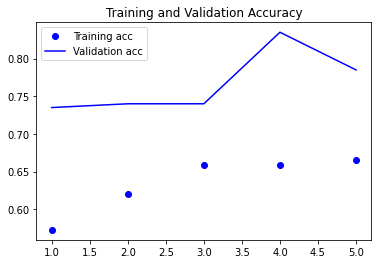

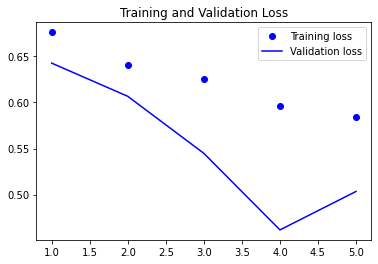

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('katmancıktı.h5')

In [ ]:
from keras import layers
from keras import models
#katmanlar ve düğüm
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
#katmancıkarıldı




model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))#duğumbuyudu
# fonksiyonu sigmoid olarak kullanarak çıkan değeri [0,1] arasına sıkıştırdık
# çünki ikili sınıflandırma var (hasta, sağlıklı)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator ## veri çeşitlendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(#doğrulama
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')


Found 2109 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [ ]:
history = model.fit(
                train_generator,
                steps_per_epoch = 20,
                epochs = 5,
                validation_data = validation_generator,
                validation_steps = 10)

Epoch 1/5
20/20 [==============================] - 31s 1s/step - loss: 0.6791 - acc: 0.5575 - val_loss: 0.6436 - val_acc: 0.5350
Epoch 2/5
20/20 [==============================] - 28s 1s/step - loss: 0.6283 - acc: 0.6700 - val_loss: 0.5954 - val_acc: 0.7250
Epoch 3/5
20/20 [==============================] - 26s 1s/step - loss: 0.6257 - acc: 0.6625 - val_loss: 0.5254 - val_acc: 0.8350
Epoch 4/5
20/20 [==============================] - 25s 1s/step - loss: 0.6108 - acc: 0.6500 - val_loss: 0.5325 - val_acc: 0.7950
Epoch 5/5
20/20 [==============================] - 24s 1s/step - loss: 0.5647 - acc: 0.6975 - val_loss: 0.4781 - val_acc: 0.7750


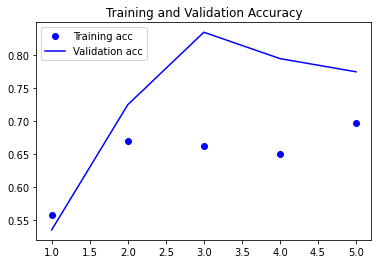

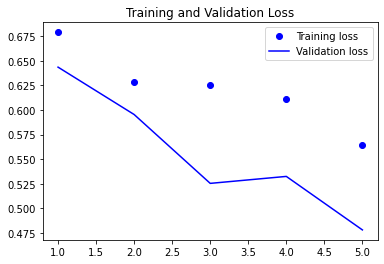

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('dense1024.h5')

In [ ]:
from keras import layers
from keras import models
#katmanlar ve düğüm
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
#katmaneklendi




model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))#dugum 256 ya cekildi
# fonksiyonu sigmoid olarak kullanarak çıkan değeri [0,1] arasına sıkıştırdık
# çünki ikili sınıflandırma var (hasta, sağlıklı)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator ## veri çeşitlendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(#doğrulama
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')


Found 2109 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [ ]:
history = model.fit(
                train_generator,
                steps_per_epoch = 20,
                epochs = 5,
                validation_data = validation_generator,
                validation_steps = 10)

Epoch 1/5
20/20 [==============================] - 89s 4s/step - loss: 0.6768 - acc: 0.5625 - val_loss: 0.6499 - val_acc: 0.5400
Epoch 2/5
20/20 [==============================] - 54s 3s/step - loss: 0.6524 - acc: 0.6195 - val_loss: 0.6005 - val_acc: 0.7200
Epoch 3/5
20/20 [==============================] - 42s 2s/step - loss: 0.6290 - acc: 0.6450 - val_loss: 0.5171 - val_acc: 0.8250
Epoch 4/5
20/20 [==============================] - 34s 2s/step - loss: 0.5992 - acc: 0.6850 - val_loss: 0.5009 - val_acc: 0.7700
Epoch 5/5
20/20 [==============================] - 30s 2s/step - loss: 0.5516 - acc: 0.7455 - val_loss: 0.4575 - val_acc: 0.7950


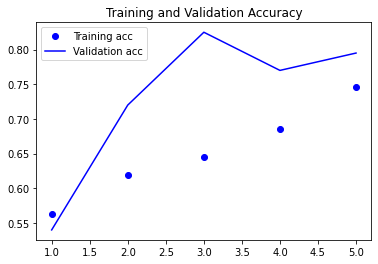

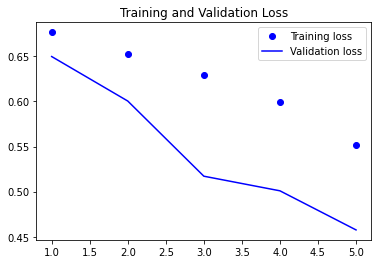

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('dense256.h5')

INFO:tensorflow:Assets written to: dense256/assets


In [ ]:
from keras import layers
from keras import models
#katmanlar ve düğüm
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
#katmaneklendi




model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))#dugum 512 ya cekildi
# fonksiyonu sigmoid olarak kullanarak çıkan değeri [0,1] arasına sıkıştırdık
# çünki ikili sınıflandırma var (hasta, sağlıklı)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
from keras import optimizers
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator ## veri çeşitlendirme
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(#doğrulama
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = 'binary')


Found 2109 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


In [ ]:
history = model.fit(
                train_generator,
                steps_per_epoch = 20,
                epochs = 5,
                validation_data = validation_generator,
                validation_steps = 10)

Epoch 1/5
20/20 [==============================] - 32s 2s/step - loss: 0.6903 - acc: 0.5325 - val_loss: 0.6811 - val_acc: 0.5200
Epoch 2/5
20/20 [==============================] - 29s 1s/step - loss: 0.6829 - acc: 0.5475 - val_loss: 0.6626 - val_acc: 0.8000
Epoch 3/5
20/20 [==============================] - 24s 1s/step - loss: 0.6597 - acc: 0.5900 - val_loss: 0.5760 - val_acc: 0.7800
Epoch 4/5
20/20 [==============================] - 24s 1s/step - loss: 0.6063 - acc: 0.6875 - val_loss: 0.4983 - val_acc: 0.8000
Epoch 5/5
20/20 [==============================] - 23s 1s/step - loss: 0.5542 - acc: 0.7275 - val_loss: 0.4672 - val_acc: 0.7650


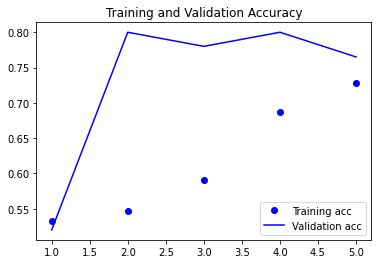

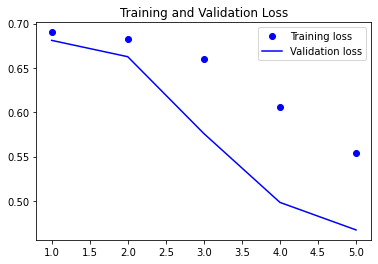

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
model.save('dens512.h5')